In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
ins_data = pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')

In [3]:
# This file looks at the same factors and makes the same assumptions as the auto_complaints_reason file, but focuses
# on health insurers

In [4]:
# Selecting rows with sub_reasons identified as potentially resulting in high legal fees. While there were 
# three SubReasons associated with "delays", two had a count of one so were excluded
# All reasons in the 'isin' call were in the top 20 for justified conclusions, which is in line with Chadwell's 
# comment that these reasons are hard to litigate against
sub_reasons = ins_data[ins_data['SubReason'].isin(['Unsatisfactory Offer', 
                                                 'Premium/Notice', 'Premium/Rate Increase', 'Medical Necessity',
                                                'Actual Cash Value', 'Claim Delays', 
                                                 'Denial of Claim'])]

In [5]:
sub_reasons['SubReason'].value_counts()

Denial of Claim          2503
Claim Delays             1935
Premium/Notice            545
Premium/Rate Increase     540
Unsatisfactory Offer      523
Medical Necessity         426
Name: SubReason, dtype: int64

In [6]:
# Selecting rows related to auto coverage, dropping status column. By selecting coverage prior to dropping duplicates
# the largest amount of data is preserved across all columns. 
health_df = sub_reasons[sub_reasons['Coverage'].notna()]
health_df = health_df[health_df['Coverage'].str.contains('Health')].drop(columns='Status')
health_df['SubReason'].value_counts()

Denial of Claim          297
Medical Necessity        251
Premium/Notice           109
Premium/Rate Increase     69
Claim Delays              65
Name: SubReason, dtype: int64

In [7]:
# Adding complaint duration column in months
health_df['Closed']= pd.to_datetime(health_df['Closed'])
health_df['Opened']= pd.to_datetime(health_df['Opened'])
health_df['Complaint Duration'] = health_df['Closed'] - health_df['Opened']
health_df['Complaint Duration'] = (health_df['Complaint Duration'] / np.timedelta64(1, 'M')).round(2)
health_df.sort_values('Opened', ascending=True)

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Complaint Duration
12306,Cigna Health and Life Insurance Company,100831,2011-02-16,2017-10-31,Group Health,Physical Therapy,Unfair Claims Practice,Denial of Claim,Record Only,No Authority,0.00,80.46
8778,"Anthem Health Plans, Inc",503565,2015-08-03,2016-04-06,Group Health,No SubCov - AH,Utilization Review,Denial of Claim,Claim Settled,Furnished Information,92598.92,8.12
3582,"HPHC Insurance Company, Inc.",504517,2015-09-30,2016-01-20,Group Health,Radiology,Unfair Claims Practice,Denial of Claim,Claim Paid With Interest,Justified,140.35,3.68
12282,Cigna Health and Life Insurance Company,505323,2015-11-23,2016-01-22,Group Health,Prescription,Utilization Review,Medical Necessity,Coverage Granted,Furnished Information,0.00,1.97
1805,"Anthem Health Plans, Inc",505421,2015-12-01,2016-01-20,Individual Health,Physical Therapy,Unfair Claims Practice,Denial of Claim,Furnished Information,Furnished Information,0.00,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...
802,"ConnectiCare Insurance Company, Inc",902702,2019-06-19,NaT,Group Health,Prescription,Utilization Review,Medical Necessity,NaN,NaN,0.00,NaN
785,ConnectiCare Inc,902726,2019-06-19,NaT,Group Health,Behavl Hlth/Subst Abuse,Utilization Review,Denial of Claim,NaN,NaN,0.00,NaN
1714,Primerica Life Insurance Company,902777,2019-06-24,NaT,Individual Health,Term Life,Unfair Claims Practice,Denial of Claim,NaN,NaN,0.00,NaN
1668,"Oxford Health Plans (CT), Inc",902813,2019-06-25,NaT,Group Health,Prescription,Utilization Review,Medical Necessity,NaN,NaN,0.00,NaN


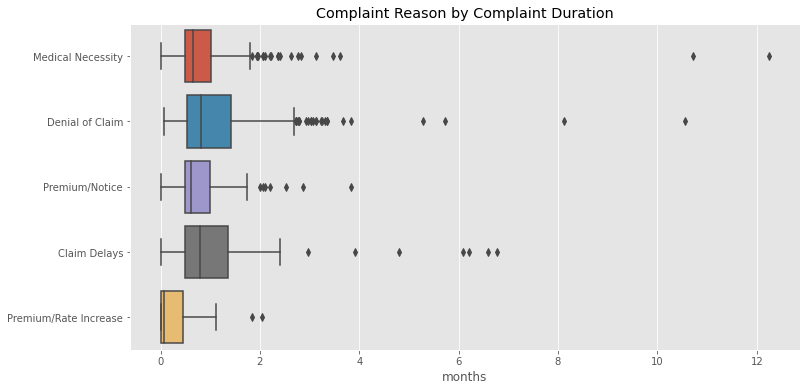

In [23]:
# Time is money. Of these subreasons for complaint identified as having high potential for litigation, plotting vs 
# duration of complaint
# Title of graph uses Reason instead of SubReason for readability
# Excluded outlier at 80 months to better see the distribution of data
no_outlier = health_df[health_df['Complaint Duration'] < 80]
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x=no_outlier['Complaint Duration'], y=no_outlier['SubReason'])
ax.set(title= 'Complaint Reason by Complaint Duration', xlabel='months', ylabel=None);
plt.savefig('Reason_duration_auto')

In [12]:
# next steps - start company analysis and normalize for company size. Look at data for top 5 auto 
# (go with well-known rather than count, as that would require finding financial information for 616 companies

In [11]:
# Choosing Anthem, United, Aetna, Cigna from the top ten- some of these companies have more than one name
top_10_health = health_df['Company'].value_counts()[0:10]
top_10_health = top_10_health.to_frame().reset_index()

top_10_health = top_10_health.rename(columns={'index':'Company', 'Company':'No. Complaints'})
top_10_health

,Company,No. Complaints
0,"Anthem Health Plans, Inc",233
1,"ConnectiCare Insurance Company, Inc",168
2,UnitedHealthcare Insurance Company,70
3,ConnectiCare Inc,63
4,"Oxford Health Plans (CT), Inc",47
5,Aetna Life Insurance Company,36
6,Cigna Health and Life Insurance Company,30
7,"Oxford Health Insurance, Incorporated",23
8,"HealthyCT, Inc.",15
9,"ConnectiCare Benefits, Inc.",14


In [13]:
# I think the only way to display what I want is with a grouped bar chart. Or, subplots
company_health = health_df[health_df['Company'].isin(['Anthem Health Plans, Inc', 
                                                'UnitedHealthcare Insurance Company', 'Aetna Life Insurance Company', 
                                                'Cigna Health and Life Insurance Company'])]

In [18]:
# Pulling value counts for each SubReason and company
anthem = company_health[company_health['Company'] == 'Anthem Health Plans, Inc'].groupby('SubReason').count()
united = company_health[company_health['Company'] == 'UnitedHealthcare Insurance Company'].groupby('SubReason').count()
aetna = company_health[company_health['Company'] == 'Aetna Life Insurance Company'].groupby('SubReason').count()
cigna  = company_health[company_health['Company'] == 'Cigna Health and Life Insurance Company'].groupby('SubReason').count()
cigna

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,Disposition,Conclusion,Recovery,Complaint Duration
SubReason,,,,,,,,,,,
Claim Delays,3,3,3,3,3,3,3,3,3,3,3
Denial of Claim,16,16,16,16,16,16,16,16,16,16,16
Medical Necessity,11,11,11,11,11,11,11,11,11,11,11


In [31]:
grouped_bar_data = pd.DataFrame([
        ('Anthem','Claim Delays', 26),
        ('Anthem','Denial of Claim', 78),
        ('Anthem','Medical Necessity', 69),
        ('Anthem','Premium/Notice', 35),
        ('Anthem','Premium/Rate Increase', 25),
        
        ('United','Claim Delays', 9),
        ('United','Denial of Claim', 27),
        ('United','Medical Necessity', 33),
        ('United','Premium/Notice', 0),
        ('United','Premium/Rate Increase', 1),
    
        ('Aetna','Claim Delays', 1),
        ('Aetna','Denial of Claim', 12),
        ('Aetna','Medical Necessity', 20),
        ('Aetna','Premium/Notice', 2),
        ('Aetna','Premium/Rate Increase', 1),
    
        ('Cigna','Claim Delays', 3),
        ('Cigna','Denial of Claim', 16),
        ('Cigna','Medical Necessity', 11),
        ('Cigna','Premium/Notice', 0),
        ('Cigna','Premium/Rate Increase', 0),
    ], 
    columns=['Company', 'SubReason', 'value']
)
grouped_bar_data= grouped_bar_data.set_index(['Company', 'SubReason']).value



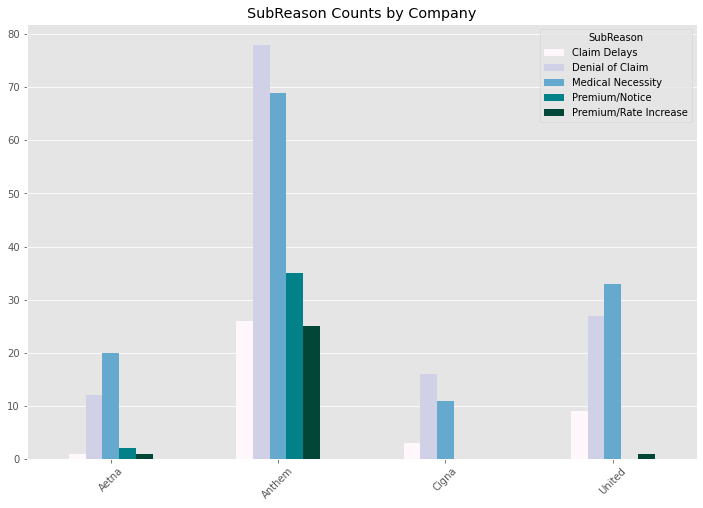

In [36]:
grp_labels = ['Aetna', 'Anthem', 'Cigna', 'United']
vis = grouped_bar_data.unstack().plot(kind='bar', stacked=False, figsize=(12,8), colormap='PuBuGn')
vis.set_xticklabels(labels=grp_labels, rotation=45)
vis.set_xlabel(None)
vis.set_title('SubReason Counts by Company')
vis.grid(which='major', axis='x')
plt.savefig('Health_subreason_company_counts')

In [28]:
# Creating a dictionary of values to be used to normalize data based on company size. 
# Used 2017 year end premium revenue (excluded other revenue streams). Values in millions
health_dict = {'Anthem': 83648, 'United': 158453, 'Cigna': 29041, 'aetna': 52022}
normed_dict = {}
# divide by highest value (united)
for k, val in health_dict.items(): 
    normed_dict[k] = val/158453
normed_dict

{'Anthem': 0.5279041734773088,
 'United': 1.0,
 'Cigna': 0.18327832227853055,
 'aetna': 0.32831186534808426}

In [32]:
# multiply each count by the associated normalization factor
normed_bar_data = pd.DataFrame([
        ('Anthem','Claim Delays', (26*0.53)),
        ('Anthem','Denial of Claim', 78*0.53),
        ('Anthem','Medical Necessity', 69*0.53),
        ('Anthem','Premium/Notice', 35*0.53),
        ('Anthem','Premium/Rate Increase', 25*0.53),
        
        ('United','Claim Delays', 9),
        ('United','Denial of Claim', 27),
        ('United','Medical Necessity', 33),
        ('United','Premium/Notice', 0),
        ('United','Premium/Rate Increase', 1),
    
        ('Aetna','Claim Delays', 1*0.33),
        ('Aetna','Denial of Claim', 12*0.33),
        ('Aetna','Medical Necessity', 20*0.33),
        ('Aetna','Premium/Notice', 2*0.33),
        ('Aetna','Premium/Rate Increase', 1*0.33),
    
        ('Cigna','Claim Delays', 3*0.18),
        ('Cigna','Denial of Claim', 16*0.18),
        ('Cigna','Medical Necessity', 11*0.18),
        ('Cigna','Premium/Notice', 0*0.18),
        ('Cigna','Premium/Rate Increase', 0*0.18),
    ], 
    columns=['Company', 'SubReason', 'value']
)
normed_bar_data= normed_bar_data.set_index(['Company', 'SubReason']).value

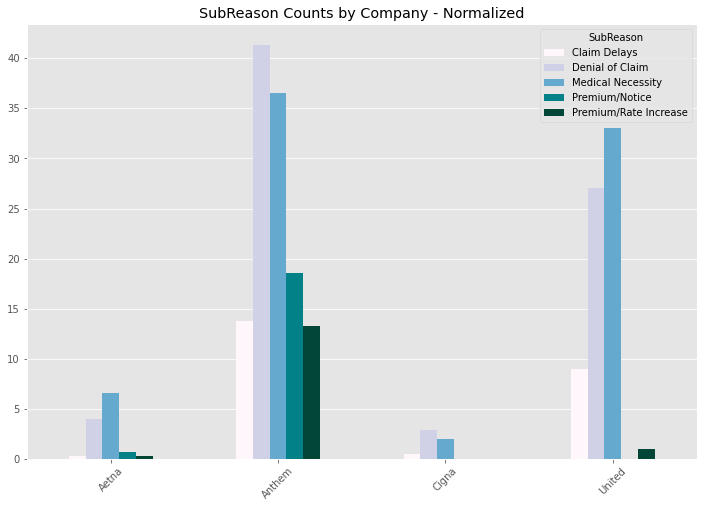

In [39]:
# Normalized bar chart
grp_labels = ['Aetna', 'Anthem', 'Cigna', 'United']
vis = normed_bar_data.unstack().plot(kind='bar', stacked=False, figsize=(12,8), colormap='PuBuGn')
vis.set_xticklabels(labels=grp_labels, rotation=45)
vis.set_xlabel(None)
vis.set_title('SubReason Counts by Company - Normalized')
vis.grid(which='major', axis='x')
plt.savefig('Health_subreason_company_counts_normed')